In [1]:
import os
import genetic_script as gs
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
def get_file_from_params(itrs, parents, best, cr, mr, wcov=1, wbal=1, wfair=1, wstr=1, wspr=1):
    result = "./test_results/" + str(itrs) + "_" + str(parents) + "_" + str(best) + "_" + str(cr) + "_" + str(mr) + "_" + str(wcov) + "_" + str(wbal) + "_" + str(wfair) + "_" + str(wstr) + "_" + str(wspr) + ".txt"
    return result

def get_best_values(dfs, compare_stat="best"):
    result = list()
    for df in dfs:
        result.append(min(df[compare_stat]))
    return result


def get_last_values(filename):
    with open(filename, 'r') as f:
        line = f.readlines()[-2]
        splitted = line.split("|")
        best = float(splitted[0].split(":")[1])
        cov = float(splitted[1].split(":")[1])
        bal = float(splitted[2].split(":")[1])
        fair = float(splitted[3].split(":")[1])
        avg = float(splitted[4].split(":")[1])

        return best, cov, bal, fair, avg

def get_time(filename):
    with open(filename, 'r') as f:
        return f.readlines()[-1]

In [3]:
directory_name = "./test_results/"
directory = os.fsencode(directory_name)

In [66]:
def parse_dir(d):
    
    df = pd.DataFrame()
    
    iters = []
    parents = []
    best = []
    crs = []
    mrs = []
    w_covs = []
    w_bals = []
    w_fairs = []
    w_streaks = []
    w_spreads = []
    
    best_penalty = []
    cov_penalty = []
    bal_penalty = []
    fair_penalty = []
    avg_penalty = []
    times = []
    
    convergences = []
    
    directory = os.fsencode(d)
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        
        with open(d + filename, "r") as f:
            if len(f.readlines()) < 2003:
                continue
                
        params = filename[:-4].split("_")
        nb_iters = int(params[0])
        nb_parents = int(params[1])
        nb_best = int(params[2])
        cr = float(params[3])
        mr = float(params[4])
        w_cov = float(params[5])
        w_bal = float(params[6])
        w_fair = float(params[7])
        w_streak = float(params[8])
        w_spread = float(params[9])
        
        iters.append(nb_iters)
        parents.append(nb_parents)
        best.append(nb_best)
        crs.append(cr)
        mrs.append(mr)
        w_covs.append(w_cov)
        w_bals.append(w_bal)
        w_fairs.append(w_fair)
        w_streaks.append(w_streak)
        w_spreads.append(w_spread)
        
        best_p, cov_p, bal_p, fair_p, avg_p = get_last_values(d + filename)
        best_penalty.append(best_p)
        cov_penalty.append(cov_p)
        bal_penalty.append(bal_p)
        fair_penalty.append(fair_p)
        avg_penalty.append(avg_p)
        
        times.append(float(get_time(d + filename)))
        
        convergences.append(
            get_convergence_best_fitness(
                gs.parse_results(get_file_from_params(params[0], params[1],params[2], params[3], params[4]))))
        
        
        
    df["iterations"] = iters
    df["nb_parents"] = parents
    df["nb_best"] = best
    df["crossover rate"] = crs
    df["mutation rate"] = mrs
    df["weight coverage"] = w_covs
    df["weight balance"] = w_bals
    df["weight fairness"] = w_fairs
    df["weight streaks"] = w_streaks
    df["weight spreads"] = w_spreads
    
    df["best fitness"] = best_penalty
    df["coverage penalty"] = cov_penalty
    df["balance penalty"] = bal_penalty
    df["fairness penalty"] = fair_penalty
    df["average penalty"] = avg_penalty
    df["time"] = times
    
    df["convergence at"] = convergences
    
    return df
        
df = parse_dir(directory_name)    

In [63]:
df

,iterations,nb_parents,nb_best,crossover rate,mutation rate,weight coverage,weight balance,weight fairness,weight streaks,weight spreads,best fitness,coverage penalty,balance penalty,fairness penalty,average penalty,time,convergence at
0,2000,300,30,0.8,0.4,1.0,1.0,1.0,1.0,1.0,29.875000,1.333333,6.333333,1.666667,30.677656,133.887479,131
1,2000,100,50,0.6,0.4,1.0,1.0,1.0,1.0,1.0,32.291667,1.333333,4.666667,1.000000,33.059167,46.368518,221
2,2000,200,50,0.6,0.8,1.0,1.0,1.0,1.0,1.0,30.208333,1.333333,4.000000,1.333333,31.708779,93.335375,156
3,2000,100,25,0.6,0.2,1.0,1.0,1.0,1.0,1.0,32.375000,1.333333,4.666667,1.666667,32.904762,47.273481,394
4,2000,500,50,0.4,0.2,1.0,1.0,1.0,1.0,1.0,31.083333,0.666667,4.666667,1.666667,31.719056,214.109515,132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,2000,300,225,0.6,0.8,1.0,1.0,1.0,1.0,1.0,26.666667,4.000000,3.333333,1.000000,29.788611,137.133140,335
252,2000,500,375,0.6,0.8,1.0,1.0,1.0,1.0,1.0,25.708333,6.000000,0.666667,1.166667,28.708417,223.515620,339
253,2000,500,250,0.2,0.8,1.0,1.0,1.0,1.0,1.0,39.708333,18.333333,4.666667,1.666667,54.527859,231.099655,2000
254,2000,100,75,0.8,0.2,1.0,1.0,1.0,1.0,1.0,30.583333,0.666667,4.666667,1.333333,31.052917,49.414626,200


In [6]:
least_time = df.iloc[df["time"].idxmin()]
most_time = df.iloc[df["time"].idxmax()]

In [7]:
most_time

iterations           2000.000000
nb_parents            500.000000
nb_best               375.000000
crossover rate          0.200000
mutation rate           0.800000
weight coverage         1.000000
weight balance          1.000000
weight fairness         1.000000
weight streaks          1.000000
weight spreads          1.000000
best fitness           48.500000
coverage penalty       27.000000
balance penalty         4.333333
fairness penalty        2.500000
average penalty        61.901475
time                30095.550289
Name: 205, dtype: float64

In [8]:
least_time

iterations          2000.000000
nb_parents           100.000000
nb_best               10.000000
crossover rate         0.200000
mutation rate          0.400000
weight coverage        1.000000
weight balance         1.000000
weight fairness        1.000000
weight streaks         1.000000
weight spreads         1.000000
best fitness          33.083333
coverage penalty       2.000000
balance penalty        7.000000
fairness penalty       1.166667
average penalty       34.779167
time                  41.380978
Name: 20, dtype: float64

In [9]:
df.iloc[df["best fitness"].idxmin()]

iterations          2000.000000
nb_parents           500.000000
nb_best              375.000000
crossover rate         0.400000
mutation rate          0.400000
weight coverage        1.000000
weight balance         1.000000
weight fairness        1.000000
weight streaks         1.000000
weight spreads         1.000000
best fitness          25.125000
coverage penalty       2.666667
balance penalty        0.666667
fairness penalty       1.000000
average penalty       26.200250
time                 220.338073
Name: 24, dtype: float64

In [10]:
df.iloc[df["average penalty"].idxmin()]

iterations          2000.000000
nb_parents           500.000000
nb_best              250.000000
crossover rate         0.800000
mutation rate          0.400000
weight coverage        1.000000
weight balance         1.000000
weight fairness        1.000000
weight streaks         1.000000
weight spreads         1.000000
best fitness          25.291667
coverage penalty       2.000000
balance penalty        1.333333
fairness penalty       1.333333
average penalty       25.854500
time                 220.096278
Name: 201, dtype: float64

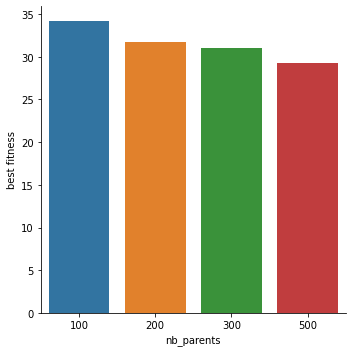

In [16]:
sns.catplot(data=df, x="nb_parents", y="best fitness", kind="bar", ci=None)

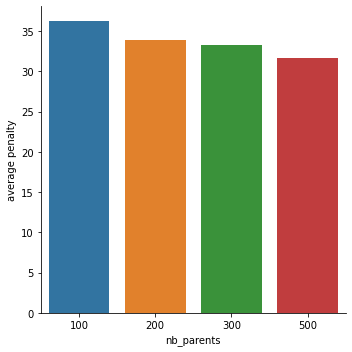

In [17]:
sns.catplot(data=df, x="nb_parents", y="average penalty", kind="bar", ci=None)

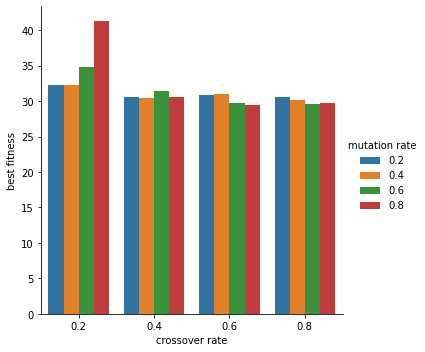

In [20]:
sns.catplot(data=df, x="crossover rate", y="best fitness", hue="mutation rate",kind="bar", ci=None)

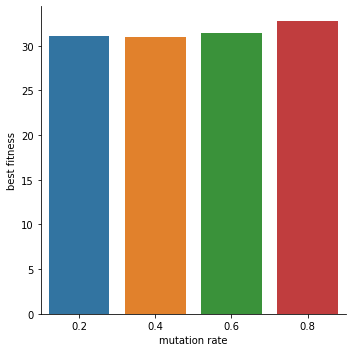

In [19]:
sns.catplot(data=df, x="mutation rate", y="best fitness", kind="bar", ci=None)

In [29]:
df_best

,iteration,best,coverage,balance,fairness,avg
0,1,925.958333,453.333333,372.666667,6.000000,1138.699083
1,2,917.000000,408.333333,410.333333,6.333333,1095.762583
2,3,917.000000,408.333333,410.333333,6.333333,1070.080083
3,4,875.125000,431.000000,345.666667,5.000000,1050.031500
4,5,875.125000,431.000000,345.666667,5.000000,1027.357833
...,...,...,...,...,...,...
1996,1997,25.125000,2.666667,0.666667,1.000000,26.229000
1997,1998,25.125000,2.666667,0.666667,1.000000,26.219667
1998,1999,25.125000,2.666667,0.666667,1.000000,26.339417
1999,2000,25.125000,2.666667,0.666667,1.000000,26.257667


In [24]:
itrs_best = 2000
parents_best = 500
nb_best_best = 375
cr_best = 0.4
mr_best = 0.4

df_best = gs.parse_results(get_file_from_params(itrs_best, parents_best, nb_best_best, cr_best, mr_best))

<AxesSubplot:xlabel='iteration', ylabel='best'>

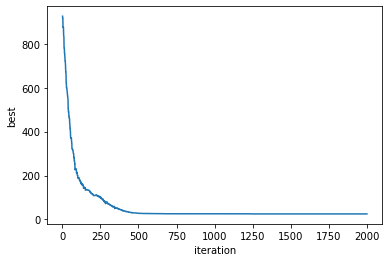

In [28]:
sns.lineplot(data=df_best, x="iteration", y="best")

In [65]:
def get_convergence_best_fitness(df):
    return find_convergence(list(df["best"]))


def find_convergence(lst):
    last_i = lst[0]
    counter = 0
    current_index = 0
    for i in lst[1:]:
        if abs(last_i - i) < 1:
            counter += 1
            if(counter >= 25):
                return current_index
        else:
            counter = 0
        last_i = i
        current_index += 1
    return 1000


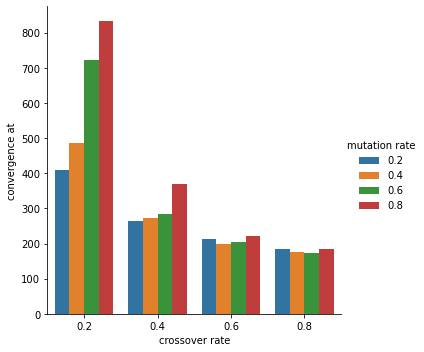

In [67]:
sns.catplot(data=df, x="crossover rate", y="convergence at", hue="mutation rate", kind="bar", ci=None)